<a href="https://colab.research.google.com/github/shivigup/IUAC-Phase-control/blob/main/code/BC_mult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Files used in the code:
## 19F_15112021.csv
## 19F_15112021_2.csv
## 28Si_23112021_1.csv
## 28Si_23112021_2.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import glob, os
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
os.chdir("drive/MyDrive/Summer 2022/IUAC/data/Usable")
dictionary = []
for a in ["19F_15112021.csv", "19F_15112021_2.csv", "28Si_23112021_1.csv", "28Si_23112021_2.csv"]:
  dictionary.append(pd.read_csv(a))

In [ ]:
phase_column_header = 'Phase Meter-Phase'
for i in range(len(dictionary)):
  dictionary[i] = dictionary[i].drop(['DATE/TIME'], axis=1)
  if(dictionary[i][phase_column_header].dtype!='float64'):
    dictionary[i] = dictionary[i].drop([0], axis=0)
    df_length = dictionary[i].shape[0]
    for j in range(1, df_length+1):
      if((dictionary[i][phase_column_header][j]).endswith('\n')):
        dictionary[i][phase_column_header][j] = dictionary[i][phase_column_header][j][:-2]
  dictionary[i][phase_column_header] = pd.to_numeric(dictionary[i][phase_column_header])

In [ ]:
for i in range(len(dictionary)):
  to_drop = []
  for j in dictionary[i].columns:
    if(dictionary[i][j].isnull().values.any()):
      to_drop.append(j)
      print(j)
  dictionary[i] = dictionary[i].drop(columns = to_drop)

GS_T_1
GS_T_1


In [ ]:
locked_val = []
for df in dictionary:
  mean = scipy.stats.circmean(df[phase_column_header], high=360, low=0)
  locked_val.append(mean)

In [ ]:
locked_val

[2.079054453560296, 3.8301836622194387, 9.097720127116913, 7.302988449439971]

In [ ]:
for i in range(len(dictionary)):
  dictionary[i]['phase_difference'] = (dictionary[i][phase_column_header] - locked_val[i])%360 - 180
  dictionary[i] = dictionary[i].drop([phase_column_header], axis=1)

In [ ]:
def Intersection(lst1, lst2):
    return set(lst1).intersection(lst2)

final_columns = dictionary[0].columns
for i in range(1, len(dictionary)):
  final_columns = Intersection(dictionary[i].columns, final_columns)


In [ ]:
final_columns = list(final_columns)
final_columns

['HVSI11',
 'EQ_021(Y)',
 'ES_021(Y)',
 'INJ_VOLTAGE',
 'ES_022(Y)',
 'TYPE_0',
 'ES_021(X)',
 'ES_022(Y-VRN)',
 'CHARGE_STATE_1',
 'GVM',
 'CHP021',
 'ES_011(Y-VRN)',
 'ES_021(Y-VRN)',
 'SF6_pressure',
 'ES_011(X)',
 'EQ_021(X)',
 'ES_022(X-VRN)',
 'Phase Meter-Freq',
 'ES_021(X-VRN)',
 'CHARGE_STATE_0',
 'IMLSN1',
 'phase_difference',
 'ES_011(X-VRN)',
 'TYPE_1',
 'CATS21',
 'ESP021',
 'ES_011(Y)',
 'ES_022(X)',
 'TOTAL_UP_CHARGE',
 'Energy']

In [ ]:
minmax = np.empty([len(final_columns), 2])

In [ ]:
for i in range(len(final_columns)):
  minmax[i, 0] = min(dictionary[0][final_columns[i]])
  minmax[i, 1] = max(dictionary[0][final_columns[i]])

In [ ]:
for i in range(1, len(dictionary)):
  for j in range(len(final_columns)):
    mi = min(dictionary[i][final_columns[j]])
    ma = max(dictionary[i][final_columns[j]])
    if(mi<minmax[j, 0]):
      minmax[j, 0] = mi
    if(ma>minmax[j, 1]):
      minmax[j, 1] = ma

In [ ]:
to_remove = minmax[:,0]==minmax[:,1]
final_columns = [d for (d, remove) in zip(final_columns, to_remove) if not remove]
minmax = [d for (d, remove) in zip(minmax, to_remove) if not remove]

In [ ]:
for df in dictionary:
  for i in range(len(final_columns)):
    df[final_columns[i]] = 10*(df[final_columns[i]] - minmax[i][0])/(minmax[i][1] - minmax[i][0])

In [ ]:
window_size = 10;
data_dim = len(final_columns)

In [ ]:
X = pd.DataFrame(columns = final_columns)
y = pd.DataFrame(columns = final_columns)

In [ ]:
for df in dictionary:
  for i in range(len(df)-1):
    if(np.abs(df.loc[i+1, 'phase_difference']) < np.abs(df.loc[i, 'phase_difference'])):
      X = X.append(df.loc[i, final_columns])
      y = y.append(df.loc[i+1, final_columns])

In [ ]:
y = y.drop(['phase_difference'], axis=1)

In [ ]:
print(X.shape, y.shape)

(21022, 29) (21022, 28)


In [ ]:
import tensorflow as tf

import random

from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
n_features = X.shape[1]
scores = np.array([])

Streaming output truncated to the last 5000 lines.
Epoch 206/300
881/881 [==============================] - 1s 2ms/step - loss: 0.0472
Epoch 207/300
881/881 [==============================] - 2s 2ms/step - loss: 0.0472
Epoch 208/300
881/881 [==============================] - 1s 2ms/step - loss: 0.0470
Epoch 209/300
881/881 [==============================] - 1s 2ms/step - loss: 0.0474
Epoch 210/300
881/881 [==============================] - 2s 2ms/step - loss: 0.0474
Epoch 211/300
881/881 [==============================] - 1s 2ms/step - loss: 0.0469
Epoch 212/300
881/881 [==============================] - 2s 2ms/step - loss: 0.0469
Epoch 213/300
881/881 [==============================] - 1s 2ms/step - loss: 0.0471
Epoch 214/300
881/881 [==============================] - 2s 2ms/step - loss: 0.0468
Epoch 215/300
881/881 [==============================] - 2s 2ms/step - loss: 0.0472
Epoch 216/300
881/881 [==============================] - 1s 2ms/step - loss: 0.0470
Epoch 217/300
881/881 [==

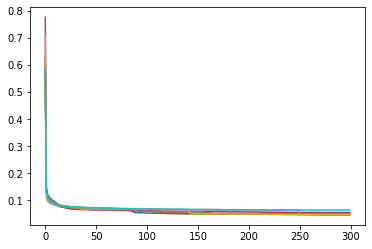

In [ ]:
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10*i)
  #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

  model = Sequential()
  model.add(Dense(n_features, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
  model.add(Dense(n_features-1))

  #model.summary()

  model.compile(optimizer='adam', loss='mae')

  history = model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=1)
  plt.plot(history.history['loss']) 
  score = model.evaluate(X_test, y_test)
  scores = np.append(scores, score)

In [ ]:
scores.mean()

0.049831625819206235

In [ ]:
scores.std()

0.0046238204237658105

In [ ]:
scores

array([0.04655303, 0.04746401, 0.04771247, 0.05242634, 0.04503845,
       0.0514034 , 0.04925915, 0.04864426, 0.04757593, 0.06223921])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 29)                870       
                                                                 
 dense_23 (Dense)            (None, 28)                840       
                                                                 
Total params: 1,710
Trainable params: 1,710
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('BC_dense.h5')

In [ ]:
l_1 = model.layers[0]

In [ ]:
w = l_1.get_weights()

In [ ]:
len(w)

2

In [ ]:
var_imp = np.array([])

In [ ]:
for i in range(n_features):
  sum = np.sum(np.abs(w[0][i]))
  var_imp = np.append(var_imp, sum)

In [ ]:
print(var_imp)

[5.14609051 7.60100079 7.65066719 6.13122463 6.83953333 6.29309702
 5.36823606 2.50146389 6.15268135 6.38501501 6.67357731 8.51546383
 3.20390558 5.80912161 5.4566679  6.19830561 6.74683571 2.18494606
 2.11237764 6.85345411 3.09257913 6.23852301 5.2768507  5.64963913
 6.44039059 7.02209616 7.64465904 5.53417349 6.99135637]


In [ ]:
range()

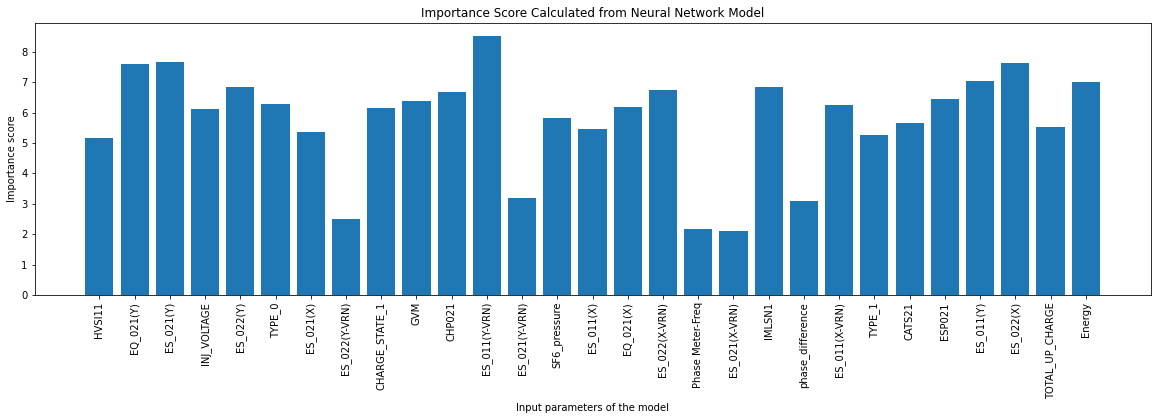

In [ ]:
x_axis = range(n_features)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.bar(x_axis, var_imp, align='center')
plt.xticks(x_axis, final_columns)
plt.xticks(rotation=90)

plt.xlabel('Input parameters of the model')
plt.ylabel('Importance score')
plt.title('Importance Score Calculated from Neural Network Model')
plt.savefig('Imp_score.png')
plt.show()
